# Data Analysis Assignment

Business problem
Most American institutions (that are not necessarily the top 10-20) that provide undergraduate education face a challenge i.e. what kind of students they will make an offer for admission so that they can maintain a good performance in terms of number of students completing their courses in time. They also need to predict how the current batch of intake will perform. The universities cannot relax the entry criteria too much as that way the quality of education that they provide gets diluted. At the other hand, they have to make offers to the candidates who are not only having appropriate profile but are also most likely to accept the offers.
On the other side, the students have a challenge deciding which colleges they should apply i.e. the colleges that provide best performance at a minimal cost given their own profiles. The student profile is determined by not only the performance in examination such as SAT and ACT, but also other data points such as their ethnicity, immigration status, gender etc.

We will be interested in answering three main questions for an institute i.e.
(a) What will be a likely enrollment rate?
(b) What will be a likely graduation rate?
(c) Which are the most lucrative colleges for students in terms of pass rate and cost?

1. Data Preparation: Cleaning and Formatting.
2. Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).
Quantitative and qualitative analysis: Asking and Answering Questions.
1.Do universities with a high number of applications are the preferred ones by students? in other words, could the number of applications tell us that a university is one of the most preferred by students?
2.Do students prefer universities that have a high rate of admission? in other words, do students prefer a university where it is easier for them to be admitted?
3.Do students prefer public or private universities?
4.Do students prefer universities with low tuition and fees?
5.Do students prefer a university for its low on-campus cost of living?
6.Do students prefer universities from highly populated states?
7.Do students prefer a university because it belongs to a state with a high GDP per capita?
8.Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?
4. Inferences and Conclusions.


# Reading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
universities_df = pd.read_csv("universities_data.csv")

In [4]:
universities_df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

# Cleaning and formatting

In [5]:
universities_df.shape

(1534, 145)

In [6]:
universities_df.info(max_cols=145)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

# NaN Values

In [7]:
perc_nan=universities_df.isna().sum()/len(universities_df)*100

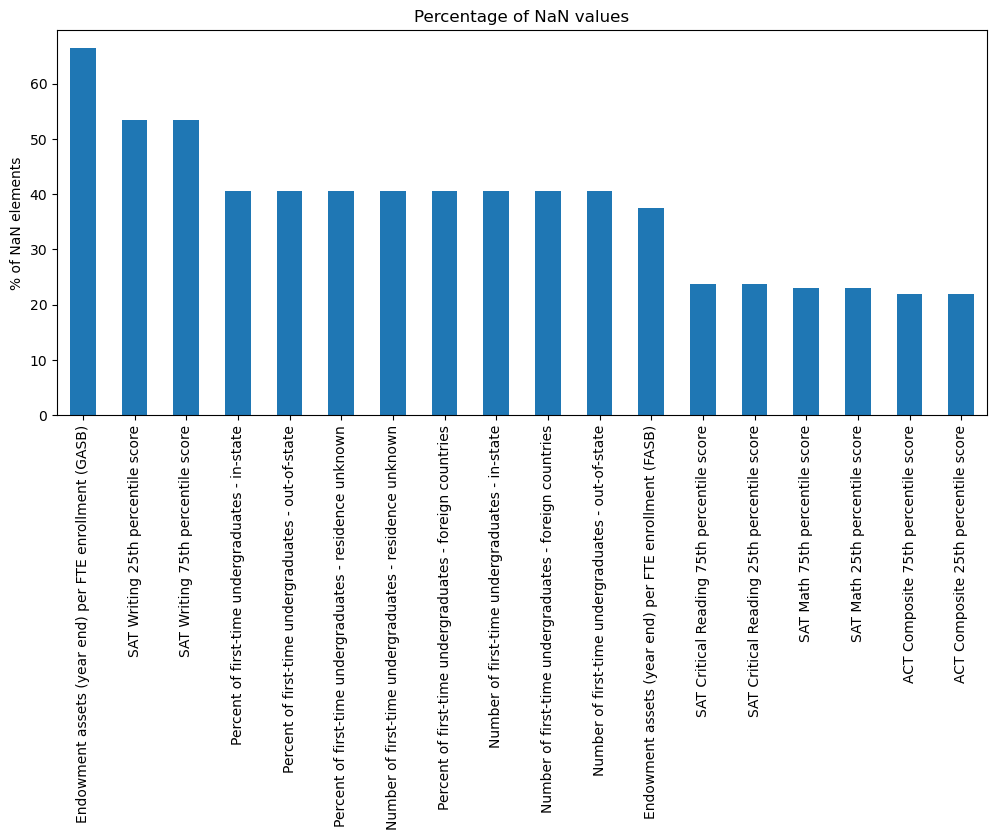

In [8]:
ax=perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(12,5));
ax.set_ylabel('% of NaN elements');

In [9]:
colum_off=universities_df.isna().sum()[universities_df.isna().sum()>=(0.2*len(universities_df))]
list_colum_off=colum_off.index.to_list()
list_colum_off

['SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentile score',
 'SAT Writing 75th percentile score',
 'ACT Composite 25th percentile score',
 'ACT Composite 75th percentile score',
 'Number of first-time undergraduates - in-state',
 'Percent of first-time undergraduates - in-state',
 'Number of first-time undergraduates - out-of-state',
 'Percent of first-time undergraduates - out-of-state',
 'Number of first-time undergraduates - foreign countries',
 'Percent of first-time undergraduates - foreign countries',
 'Number of first-time undergraduates - residence unknown',
 'Percent of first-time undergraduates - residence unknown',
 'Endowment assets (year end) per FTE enrollment (GASB)',
 'Endowment assets (year end) per FTE enrollment (FASB)']

In [10]:
universitiesnw_df=universities_df.copy()

In [11]:
universitiesnw_df.drop(list_colum_off,axis=1,inplace=True)

In [12]:
interesting_columns=['Name','year','Highest degree offered',"Offers Bachelor's degree",
                     "Offers Master's degree",
                     "Offers Doctor's degree - research/scholarship",
                     "Offers Doctor's degree - professional practice",'Applicants total',
                     'Admissions total','Enrolled total','Estimated enrollment, total',
                     'Tuition and fees, 2013-14',
                     'Total price for in-state students living on campus 2013-14',
                     'Total price for out-of-state students living on campus 2013-14',
                     'State abbreviation','Control of institution','Total enrollment',
                     'Full-time enrollment','Part-time enrollment',
                     'Undergraduate enrollment','Graduate enrollment',
                     'Full-time undergraduate enrollment',
                     'Part-time undergraduate enrollment',
                     'Percent of total enrollment that are women',
                     'Percent of undergraduate enrollment that are women',
                     'Percent of graduate enrollment that are women',
                     'Graduation rate - Bachelor degree within 4 years, total',
                     'Graduation rate - Bachelor degree within 5 years, total',
                     'Graduation rate - Bachelor degree within 6 years, total',] 


In [13]:
universitiesnw_df=universitiesnw_df[interesting_columns]

In [14]:
universitiesnw_df[universitiesnw_df['Total enrollment'].isna()][['Name','Applicants total','Admissions total','Enrolled total','Total enrollment']]

,Name,Applicants total,Admissions total,Enrolled total,Total enrollment
257,University of North Georgia,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,NaN,NaN,NaN,NaN


In [15]:
a=universitiesnw_df[universitiesnw_df['Name']=='University of North Georgia'].index[0]
b=universitiesnw_df[universitiesnw_df['Name']=='Texas A & M University-Galveston'].index[0]
universitiesnw_df=universitiesnw_df.drop([a,b],axis=0)

In [16]:
print("Before missing value treatment :",universities_df.shape,"\nAfter missing value treatment :",universitiesnw_df.shape)

Before missing value treatment : (1534, 145) 
After missing value treatment : (1532, 29)


# Invalid Values

In [17]:
col=universitiesnw_df.select_dtypes(include=['float64','int64']).columns
col

Index(['year', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Estimated enrollment, total', 'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'Total enrollment', 'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total'],
      dtype='object')

In [18]:
lt=list()
for i in col:
    y=any(x < 0 for x in universitiesnw_df[i])
    if y==True:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))     

There are 0 negative values in the data frame.


# Inconsistent values

In [19]:
universitiesnw_df.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,1698.620104,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,2922.064160,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,167.000000,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,671.000000,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,2062.500000,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [20]:
total_zero=(universitiesnw_df[universitiesnw_df.loc[0:]==0]).count().sum()

In [21]:
print('This data set contains{} zero values.'.format(total_zero))

This data set contains395 zero values.


In [22]:
universitiesnw_df.replace(0,np.nan,inplace=True)

In [23]:
total_zero_nw=universitiesnw_df[universitiesnw_df.loc[0:]==0].count().sum()

In [24]:
print('This data set contains{} zero values.'.format(total_zero_nw))

This data set contains0 zero values.


In [25]:
universitiesnw_df[['Name','Applicants total']].sort_values('Applicants total').head()

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0


# Giving format

In [26]:
universitiesnw_df.columns

Index(['Name', 'year', 'Highest degree offered', 'Offers Bachelor's degree',
       'Offers Master's degree',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice', 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 year

In [27]:
def remove_space(list_headers,charact):
    new_headers=list()
    for header in list_headers:
        for char in charact:
            if char in header:
                headers=header.replace(char,'_')
            header=header
        new_headers.append(header)
    return new_headers
                

In [28]:
def remove_sp_char(list_headers,chars):
    new_headers=list()
    for header in headers:
        for char in chars:
            if char =='_' or char=='/':
                header=header.replace(char,'_')
            if char in header:
                header=header.replace(char,'')
                
            header=header
        new_headers.append(header)
    return new_headers           

In [29]:
headers=remove_space(universitiesnw_df.columns,[' - ',' '])

In [30]:
headers=remove_sp_char(headers,["'",',',':','-','/'])

In [31]:
list_new_header=list()

for header in headers:
    header=header.casefold()
    
    if 'degrese' in header:
        header=header.replace("degrese",'degrees')
        
    list_new_header.append(header)    
        

In [32]:
universitiesnw_df.columns=list_new_header

In [33]:
universitiesnw_df.columns

Index(['name', 'year', 'highest degree offered', 'offers bachelors degree',
       'offers masters degree', 'offers doctors degree  research_scholarship',
       'offers doctors degree  professional practice', 'applicants total',
       'admissions total', 'enrolled total', 'estimated enrollment total',
       'tuition and fees 201314',
       'total price for instate students living on campus 201314',
       'total price for outofstate students living on campus 201314',
       'state abbreviation', 'control of institution', 'total enrollment',
       'fulltime enrollment', 'parttime enrollment',
       'undergraduate enrollment', 'graduate enrollment',
       'fulltime undergraduate enrollment',
       'parttime undergraduate enrollment',
       'percent of total enrollment that are women',
       'percent of undergraduate enrollment that are women',
       'percent of graduate enrollment that are women',
       'graduation rate  bachelor degree within 4 years total',
       'graduati

In [54]:
universitiesnw_df.rename(columns={'state_abbreviation':'state'}, inplace=True)

In [35]:
universitiesnw_df.head()

,name,year,highest degree offered,offers bachelors degree,offers masters degree,offers doctors degree research_scholarship,offers doctors degree professional practice,applicants total,admissions total,enrolled total,estimated enrollment total,tuition and fees 201314,total price for instate students living on campus 201314,total price for outofstate students living on campus 201314,state abbreviation,control of institution,total enrollment,fulltime enrollment,parttime enrollment,undergraduate enrollment,graduate enrollment,fulltime undergraduate enrollment,parttime undergraduate enrollment,percent of total enrollment that are women,percent of undergraduate enrollment that are women,percent of graduate enrollment that are women,graduation rate bachelor degree within 4 years total,graduation rate bachelor degree within 5 years total,graduation rate bachelor degree within 6 years total
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,5024.0,7182.0,21849.0,27441.0,Alabama,Public,5020.0,4439.0,581.0,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,18568.0,7206.0,22495.0,31687.0,Alabama,Public,18568.0,11961.0,6607.0,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,626.0,6870.0,NaN,NaN,Alabama,Private not-for-profit,631.0,323.0,308.0,322.0,309.0,202.0,120.0,58.0,61.0,55.0,NaN,NaN,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,7376.0,9192.0,23466.0,35780.0,Alabama,Public,7376.0,4802.0,2574.0,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,6076.0,8720.0,18286.0,25222.0,Alabama,Public,6075.0,5182.0,893.0,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0


In [36]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
matplotlib.rcParams['figure.facecolor']='whitesmoke'
matplotlib.rcParams['font.size']=14

# Explortory data analysis(EDA)

In [37]:
matplotlib.rcParams['figure.facecolor']='whitesmoke'

In [38]:
from IPython.display import display
with pd.option_context('display.max_columns',None):
    display(universitiesnw_df.describe())

,year,applicants total,admissions total,enrolled total,estimated enrollment total,tuition and fees 201314,total price for instate students living on campus 201314,total price for outofstate students living on campus 201314,total enrollment,fulltime enrollment,parttime enrollment,undergraduate enrollment,graduate enrollment,fulltime undergraduate enrollment,parttime undergraduate enrollment,percent of total enrollment that are women,percent of undergraduate enrollment that are women,percent of graduate enrollment that are women,graduation rate bachelor degree within 4 years total,graduation rate bachelor degree within 5 years total,graduation rate bachelor degree within 6 years total
count,1532.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,1507.000000,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,1726.798938,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,2937.942843,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,2.000000,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,186.000000,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,695.000000,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,2112.500000,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [57]:
high_app_df =  universitiesnw_df.groupby('name')['applicants total'].sum()
high_app_df.sort_values(ascending=False)

name
University of California-Los Angeles                                     72676.0
University of California-Berkeley                                        61717.0
University of California-San Diego                                       60832.0
New York University                                                      57845.0
University of California-Irvine                                          56515.0
University of California-Santa Barbara                                   55258.0
California State University-Long Beach                                   55019.0
St John's University-New York                                            51634.0
San Diego State University                                               51163.0
University of California-Davis                                           49820.0
Liberty University                                                       48054.0
Pennsylvania State University-Main Campus                                47552.0
Northeastern University

In [58]:
high_app_df = universitiesnw_df[['name','applicants total']].sort_values("applicants total",ascending = False).head(20)
high_app_df

,name,applicants total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


Text(0.5, 0, 'Number of applications')

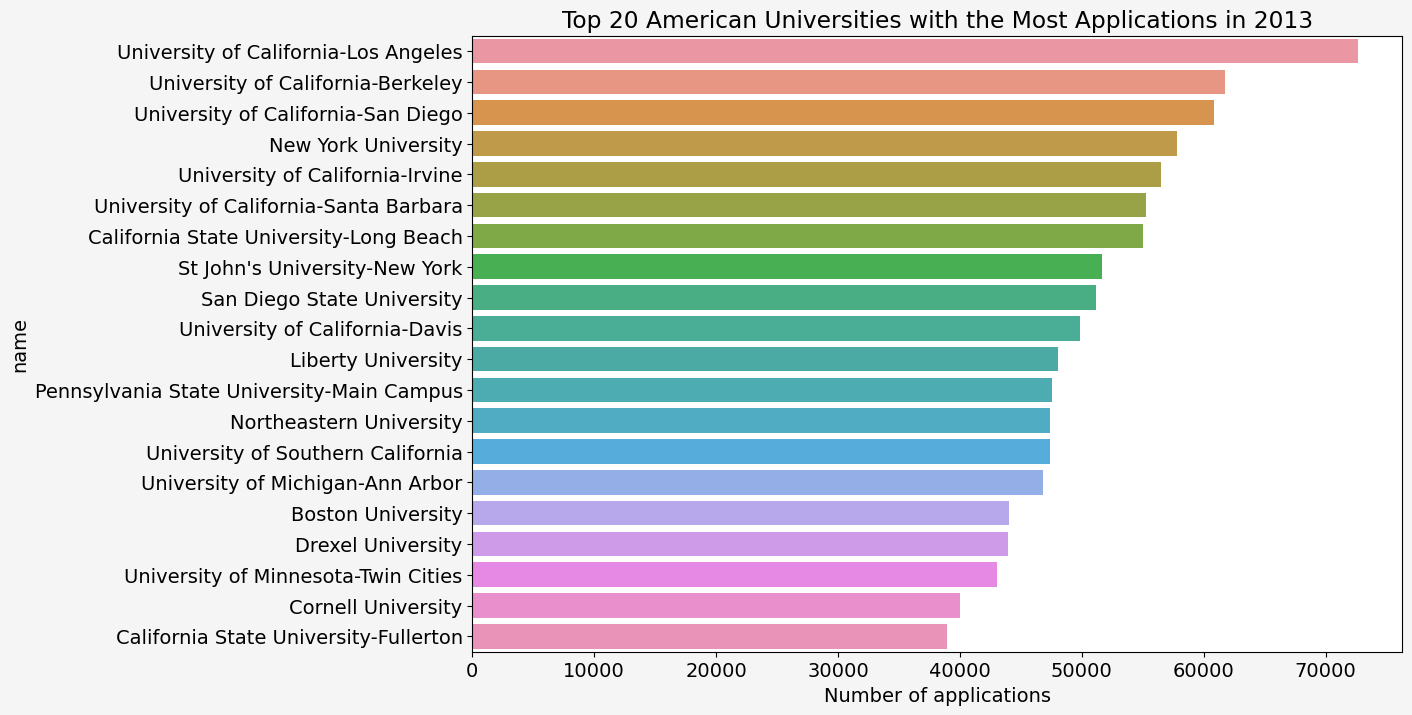

In [62]:
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=14
sns.barplot(x='applicants total',y='name',data =high_app_df )
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications')


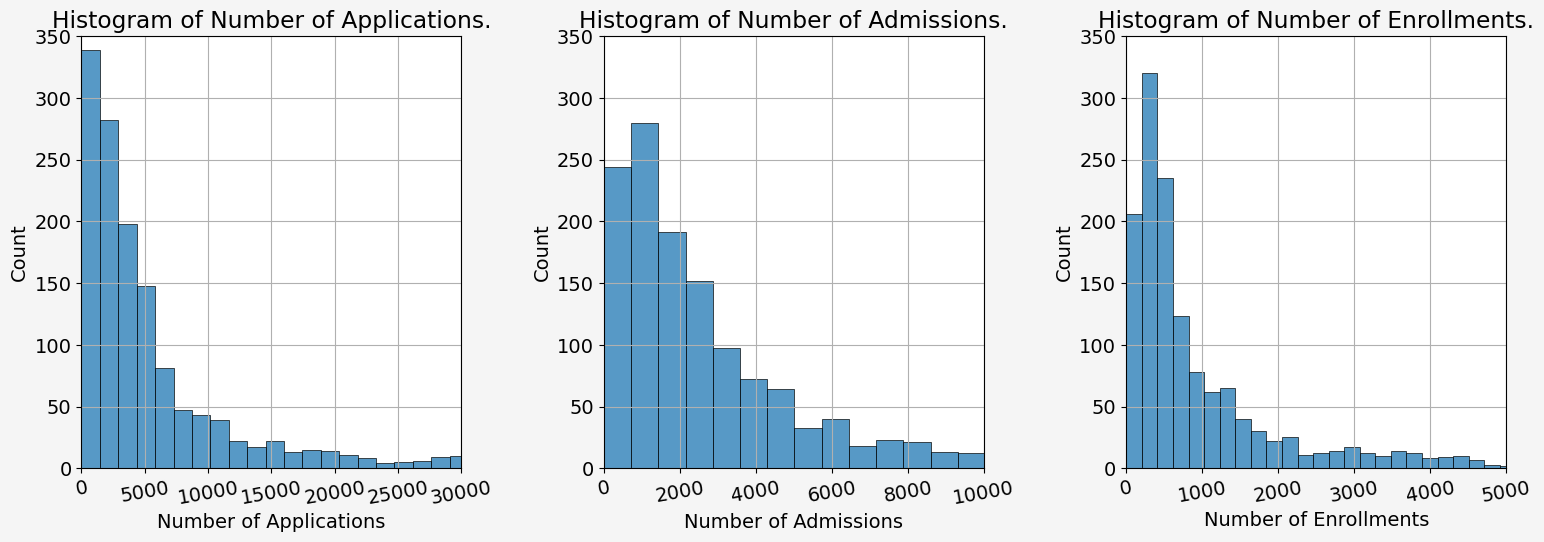

In [63]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(universitiesnw_df['applicants total'],bins=50)
plt.title('Histogram of Number of Applications.')
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,2)
sns.histplot(universitiesnw_df['admissions total'],bins=50)
plt.title('Histogram of Number of Admissions.')
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(universitiesnw_df['enrolled total'],bins=50)
plt.title('Histogram of Number of Enrollments.')
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);

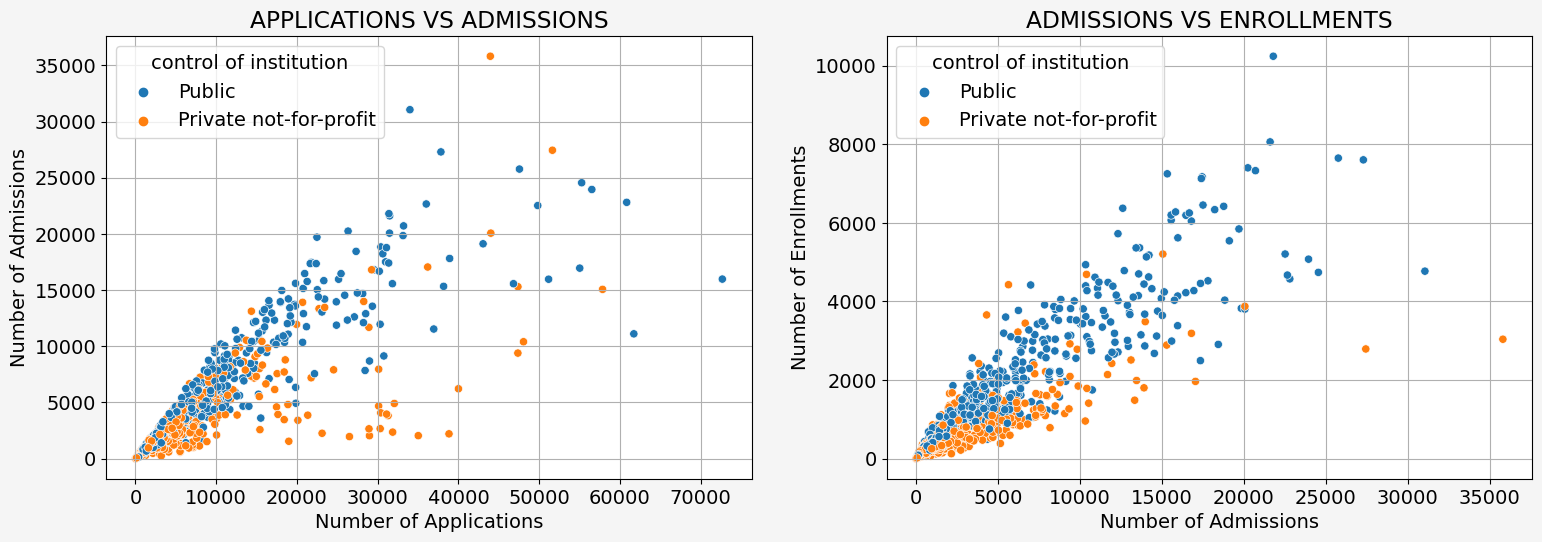

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=universitiesnw_df['admissions total'],x=universitiesnw_df['applicants total'],hue=universitiesnw_df['control of institution'])
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1,2,2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x= universitiesnw_df['admissions total'],y=universitiesnw_df['enrolled total'],data=universitiesnw_df,hue=universitiesnw_df['control of institution'])
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)

In [44]:
universitiesnw_df['acceptance_rate'] =(universitiesnw_df['admissions total']/universitiesnw_df['applicants total']* 100) 
universitiesnw_df['enrollment_rate'] =(universitiesnw_df['enrolled total']/universitiesnw_df['admissions total']* 100) 

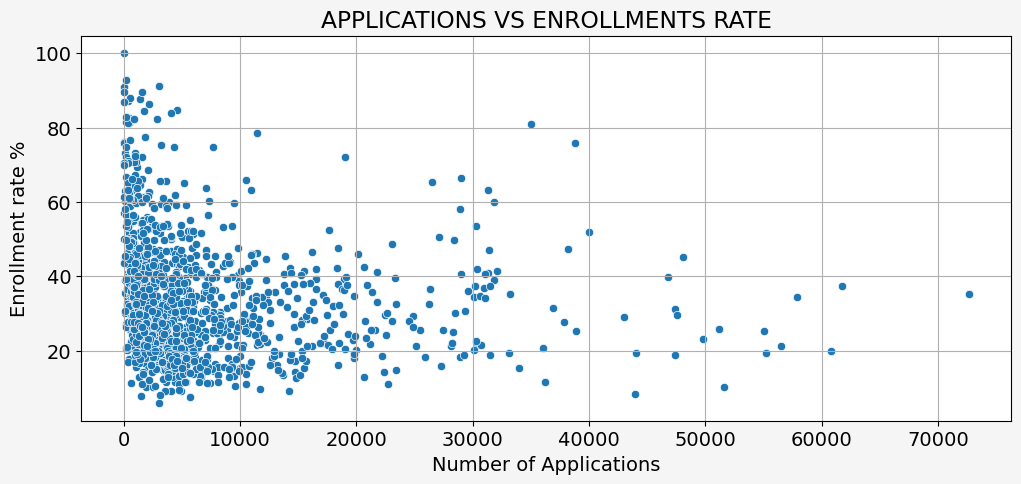

In [45]:
plt.figure(figsize = (12,5))
sns.scatterplot(x ='applicants total' , y = 'enrollment_rate' , data = universitiesnw_df)
plt.title('APPLICATIONS VS ENROLLMENTS RATE')
plt.xlabel('Number of Applications')
plt.ylabel('Enrollment rate %')
plt.grid()

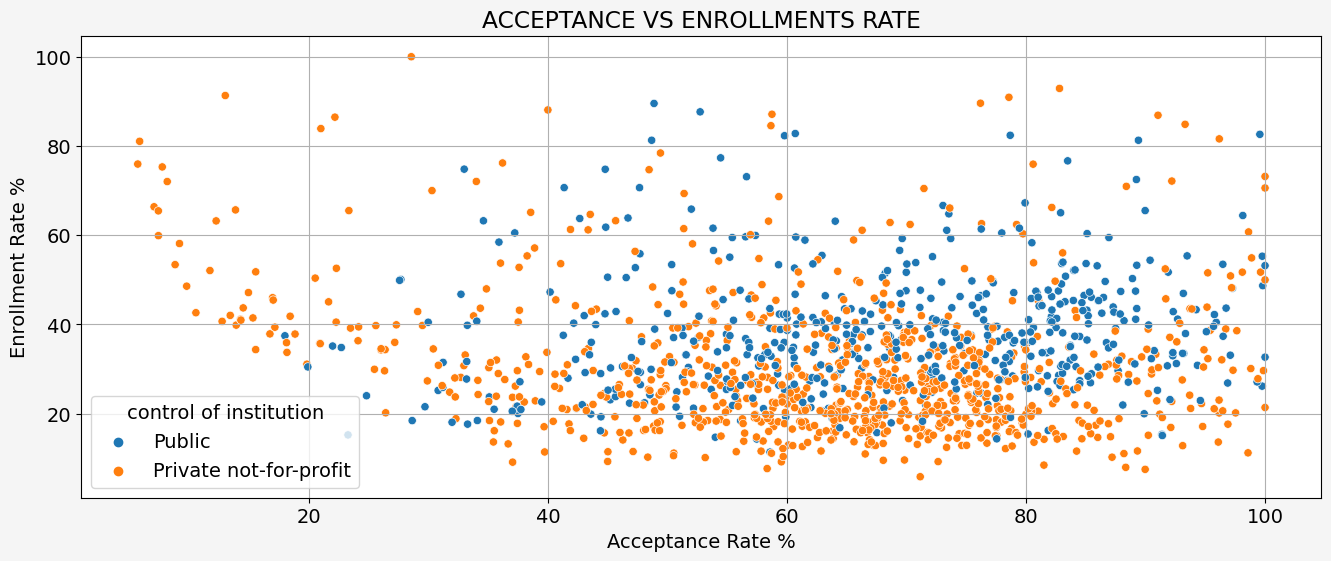

In [46]:
plt.figure(figsize = (16,6))
sns.scatterplot(x = universitiesnw_df.acceptance_rate,y = universitiesnw_df.enrollment_rate, hue = universitiesnw_df['control of institution'])
plt.title('ACCEPTANCE VS ENROLLMENTS RATE')
plt.xlabel('Acceptance Rate %')
plt.ylabel('Enrollment Rate %')
plt.grid()

In [47]:
high_acceptance=universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).head(25)

In [48]:
low_acceptance=universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).tail(25)

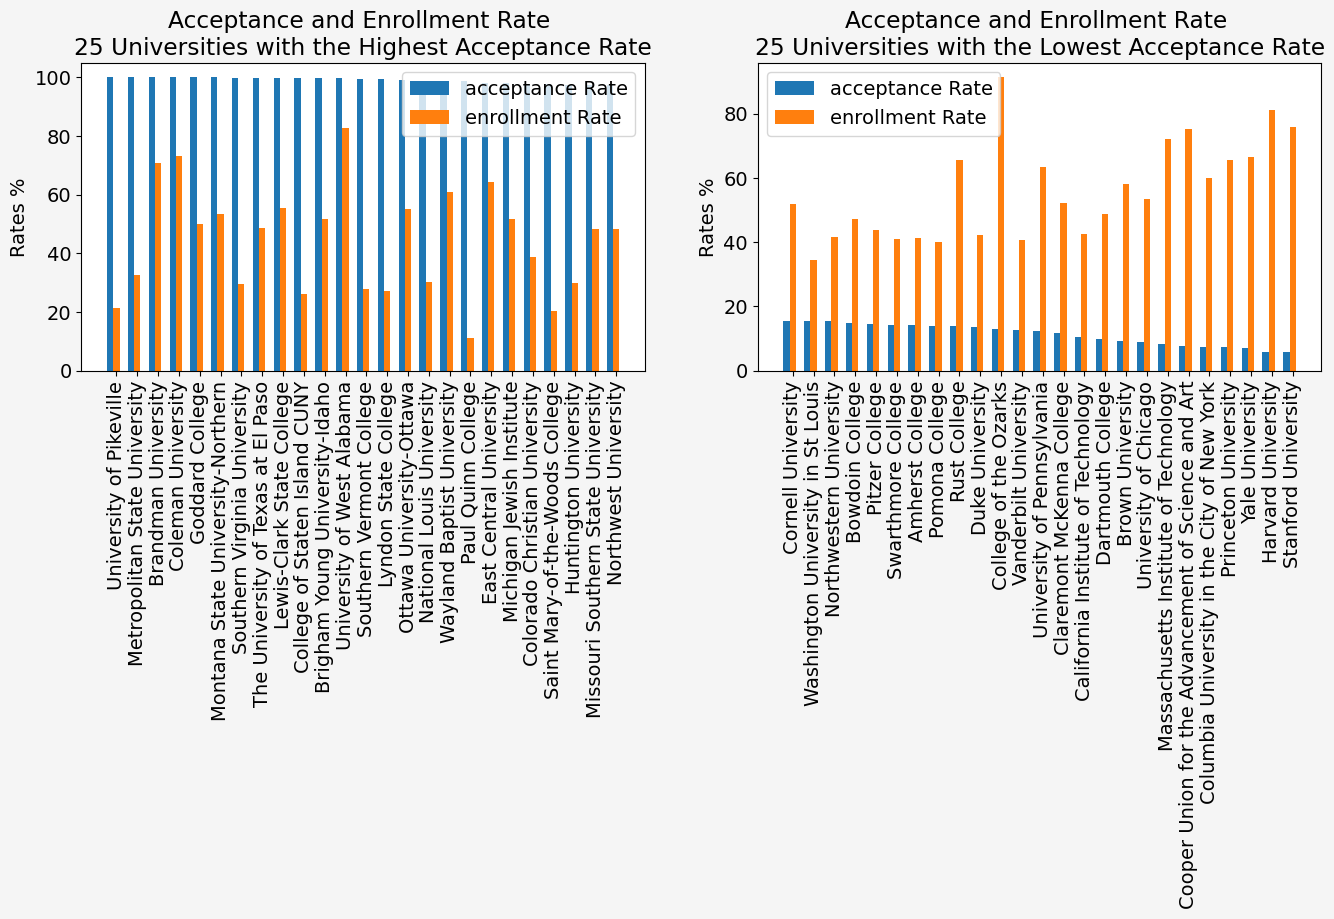

In [49]:
plt.figure(figsize = (16,4))

plt.subplot(1,2,1)
ind = np.arange(len(high_acceptance))
width = 0.30

plt.bar(ind, high_acceptance.acceptance_rate, width, label = 'acceptance Rate')
plt.bar(ind+ width, high_acceptance.enrollment_rate, width, label = 'enrollment Rate')
plt.title('Acceptance and Enrollment Rate \n25 Universities with the Highest Acceptance Rate')
plt.ylabel('Rates %')
plt.xticks(ind + width, high_acceptance.name.values, rotation = 90)
plt.legend(loc = 'best')

plt.subplot(1,2,2)
ind = np.arange(len(low_acceptance))
width = 0.30

plt.bar(ind, low_acceptance.acceptance_rate, width, label = 'acceptance Rate')
plt.bar(ind+ width, low_acceptance.enrollment_rate, width, label = 'enrollment Rate')
plt.title('Acceptance and Enrollment Rate \n25 Universities with the Lowest Acceptance Rate')
plt.ylabel('Rates %')
plt.xticks(ind + width, low_acceptance.name.values, rotation = 90)
plt.legend(loc = 'best')

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt    

In [96]:
private = universitiesnw_df[universitiesnw_df['control of institution']=='Private not-for-profit']
private = private[private['applicants total'].notnull()]
public = universitiesnw_df[universitiesnw_df['control of institution']=='Public']
public = public[public['applicants total'].notnull()]

In [136]:
#spliting the number of applications according to the type of control: private or public.
private_uni = universitiesnw_df[universitiesnw_df['control of institution']=='Private not-for-profit']
private_uni = private_uni[private_uni['applicants total'].notnull()]

public_uni = universitiesnw_df[universitiesnw_df['control of institution']=='Public']
public_uni = public_uni[public_uni['applicants total'].notnull()]
len(private_uni)

868

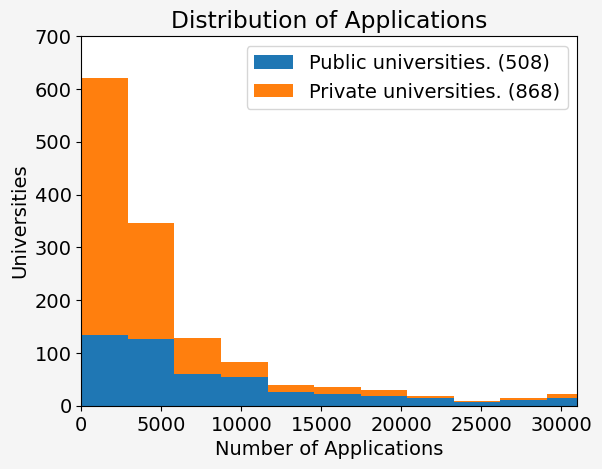

In [149]:
plt.hist([public['applicants total'],private['applicants total']],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(public)),'Private universities. ({})'.format(len(private))]);


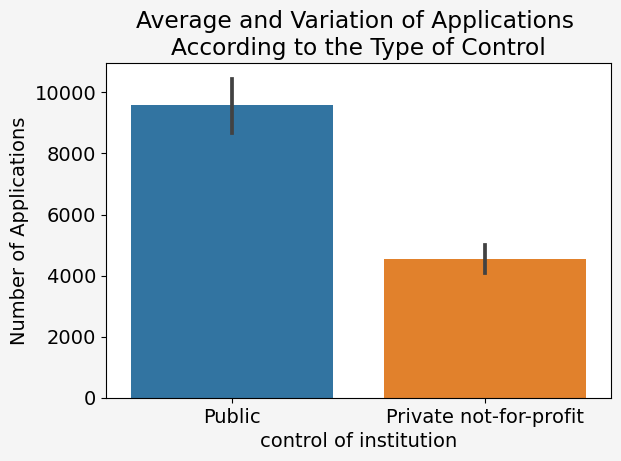

In [150]:

sns.barplot(x=universitiesnw_df['control of institution'],y=universitiesnw_df['applicants total'])
plt.title('''Average and Variation of Applications 
According to the Type of Control''')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1)

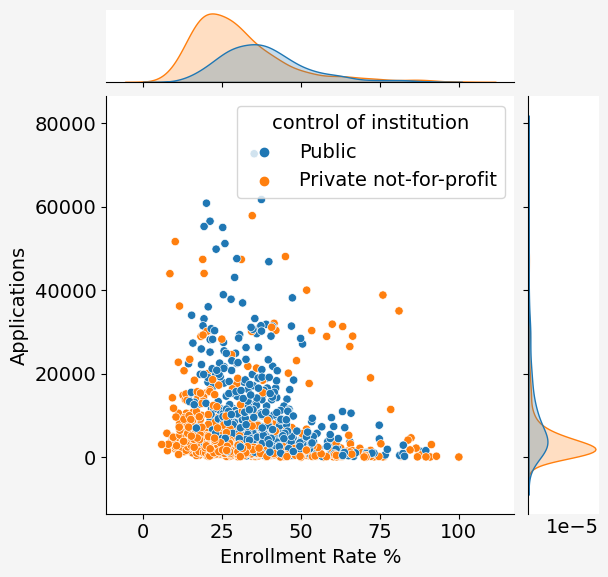

In [93]:
g=sns.jointplot(x=universitiesnw_df.enrollment_rate,y=universitiesnw_df['applicants total'],hue=universitiesnw_df['control of institution'],height=6);
g=(g.set_axis_labels("Enrollment Rate %","Applications"));

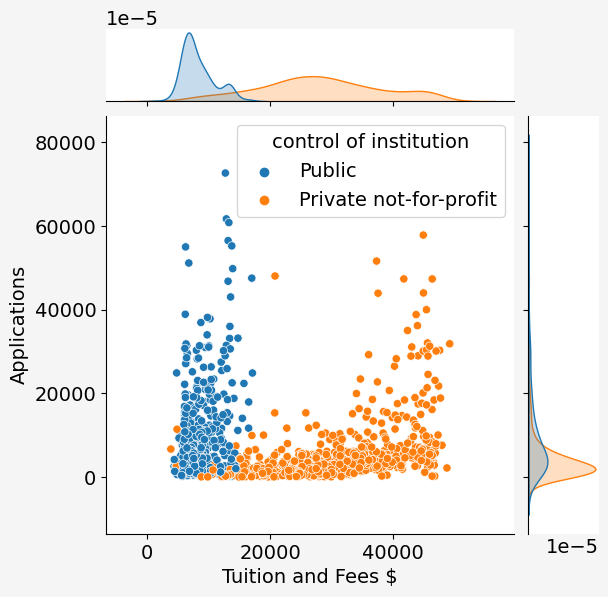

In [94]:
g=sns.jointplot(x=universitiesnw_df['tuition and fees 201314'],y=universitiesnw_df['applicants total'],hue=universitiesnw_df['control of institution'],height=6);
g=(g.set_axis_labels("Tuition and Fees $","Applications"))

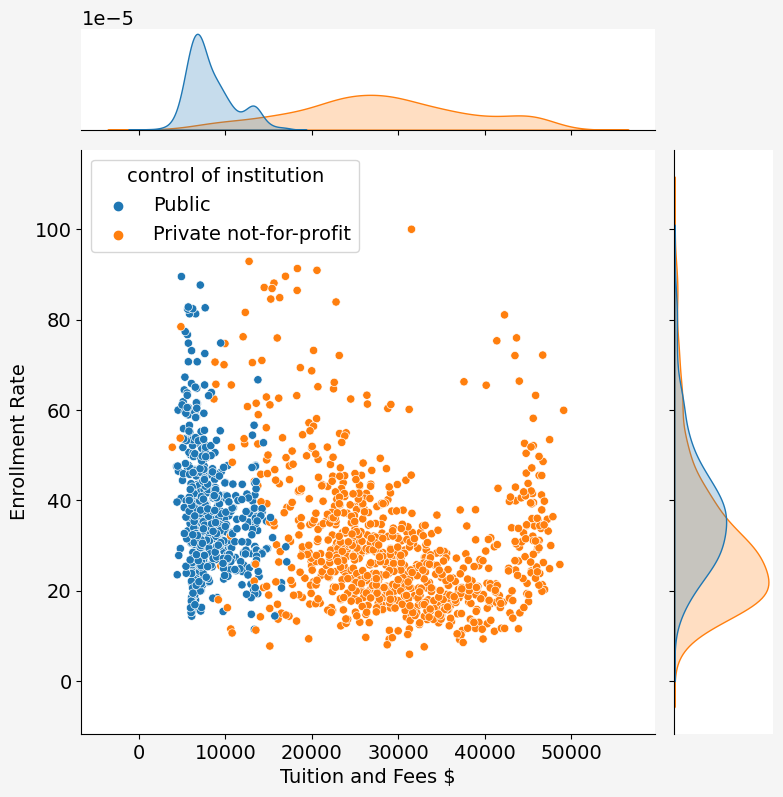

In [95]:
g=sns.jointplot(x=universitiesnw_df['tuition and fees 201314'],y=universitiesnw_df['enrollment_rate'],hue=universitiesnw_df['control of institution'],height=8);
g=(g.set_axis_labels("Tuition and Fees $","Enrollment Rate"))

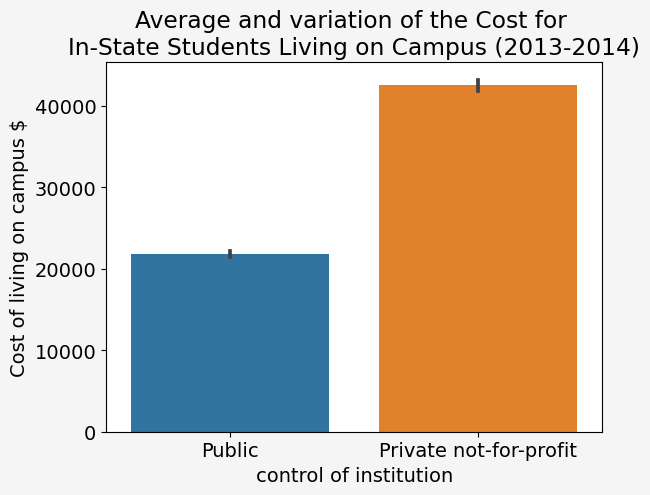

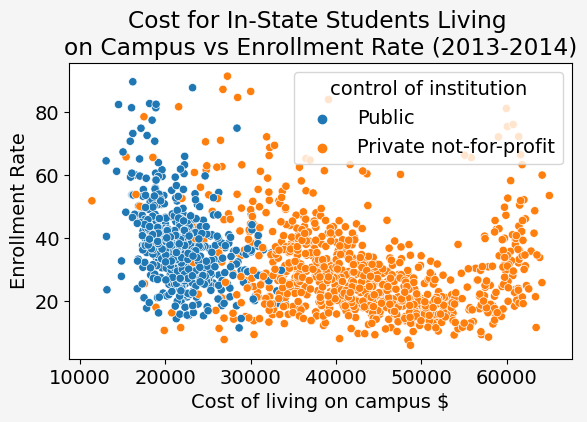

In [77]:
sns.barplot(y=universitiesnw_df['total price for instate students living on campus 201314'],x=universitiesnw_df['control of institution'])
plt.title('''Average and variation of the Cost for \nIn-State Students Living on Campus (2013-2014)''')        
plt.ylabel('Cost of living on campus $')
plt.show()
sns.scatterplot(x=universitiesnw_df['total price for instate students living on campus 201314'],y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df['control of institution']);
plt.title('''Cost for In-State Students Living \non Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')
plt.tight_layout(pad=2)

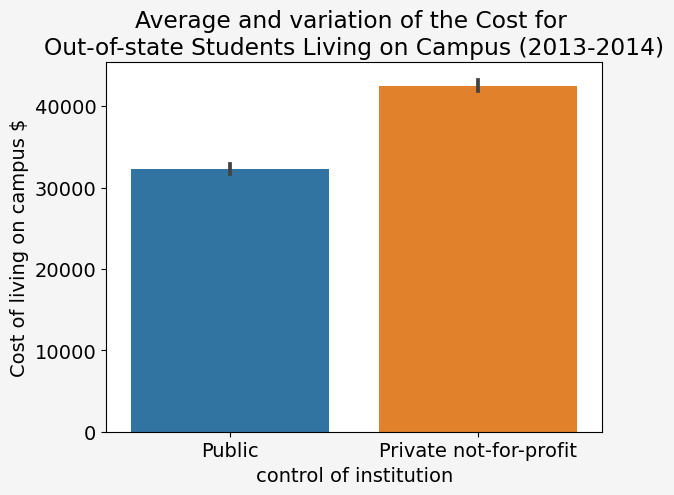

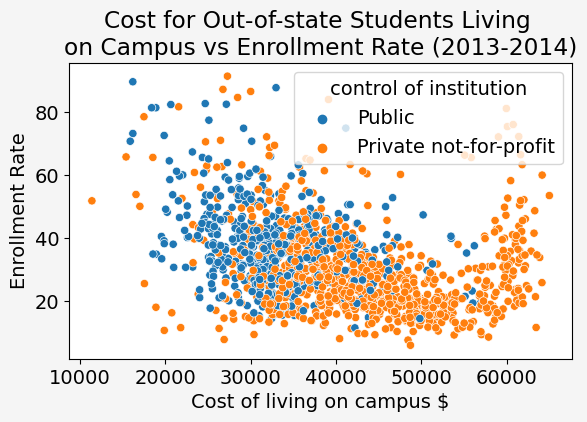

In [78]:
sns.barplot(y=universitiesnw_df['total price for outofstate students living on campus 201314'],x=universitiesnw_df['control of institution'])
plt.title('''Average and variation of the Cost for \nOut-of-state Students Living on Campus (2013-2014)''')        
plt.ylabel('Cost of living on campus $')
plt.show()
sns.scatterplot(x=universitiesnw_df['total price for outofstate students living on campus 201314'],y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df['control of institution']);
plt.title('''Cost for Out-of-state Students Living \non Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')
plt.tight_layout(pad=2)

In [ ]:
region = pd.read_csv('region.csv')

In [ ]:
region.head()

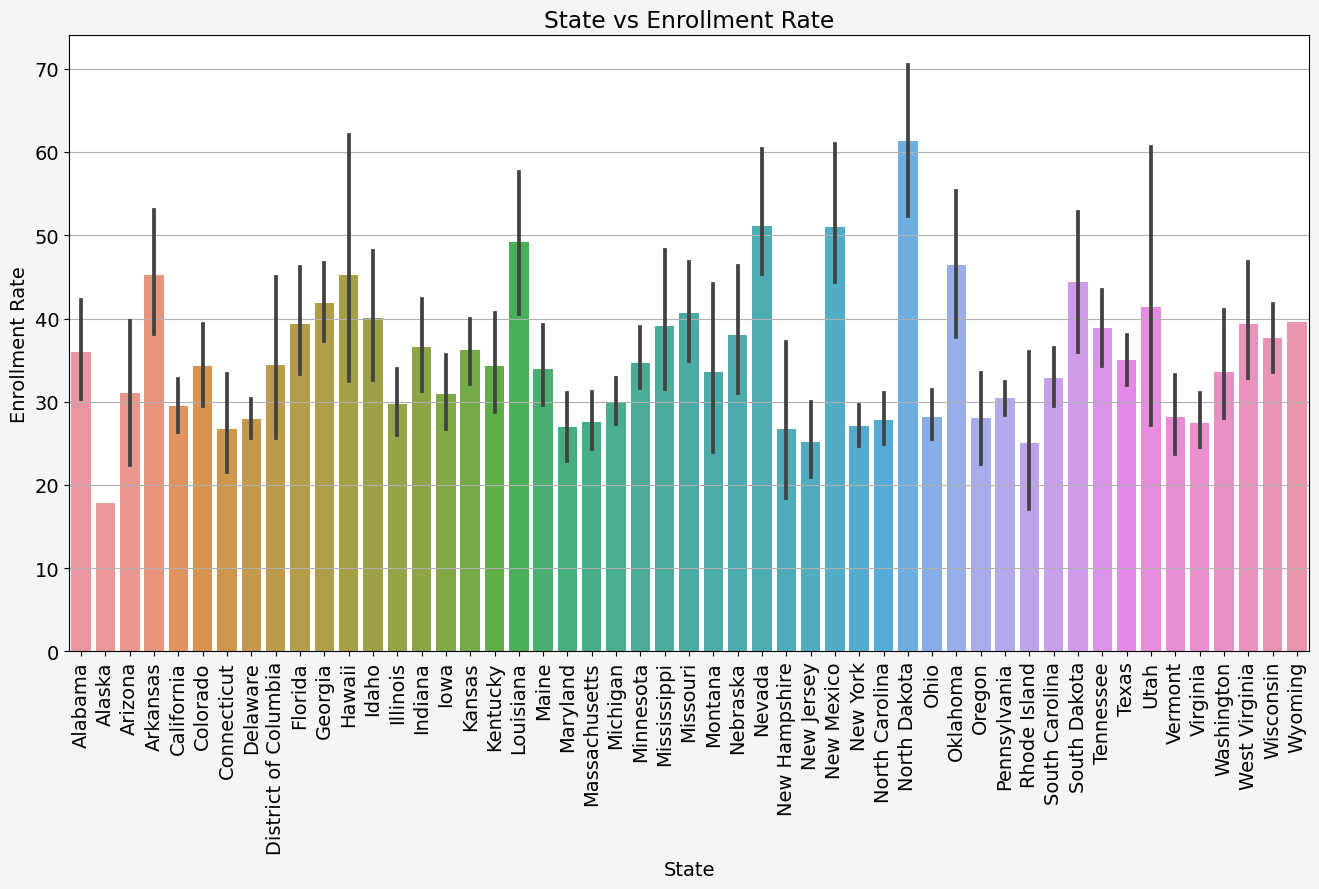

In [79]:
plt.figure(figsize=(16,8))
sns.barplot(x=universitiesnw_df['state abbreviation'],y= universitiesnw_df.enrollment_rate);
plt.title('State vs Enrollment Rate')
plt.grid(axis='y')
plt.xticks(rotation=90);
plt.xlabel('State')
plt.ylabel('Enrollment Rate');

In [81]:
with open('states_population.csv') as file:
    population_df=pd.read_csv(file)

In [82]:
population_df.head()

,state,population_2013
0,Alabama,4833722
1,Alaska,735132
2,Arizona,6626624
3,Arkansas,2959373
4,California,38332521


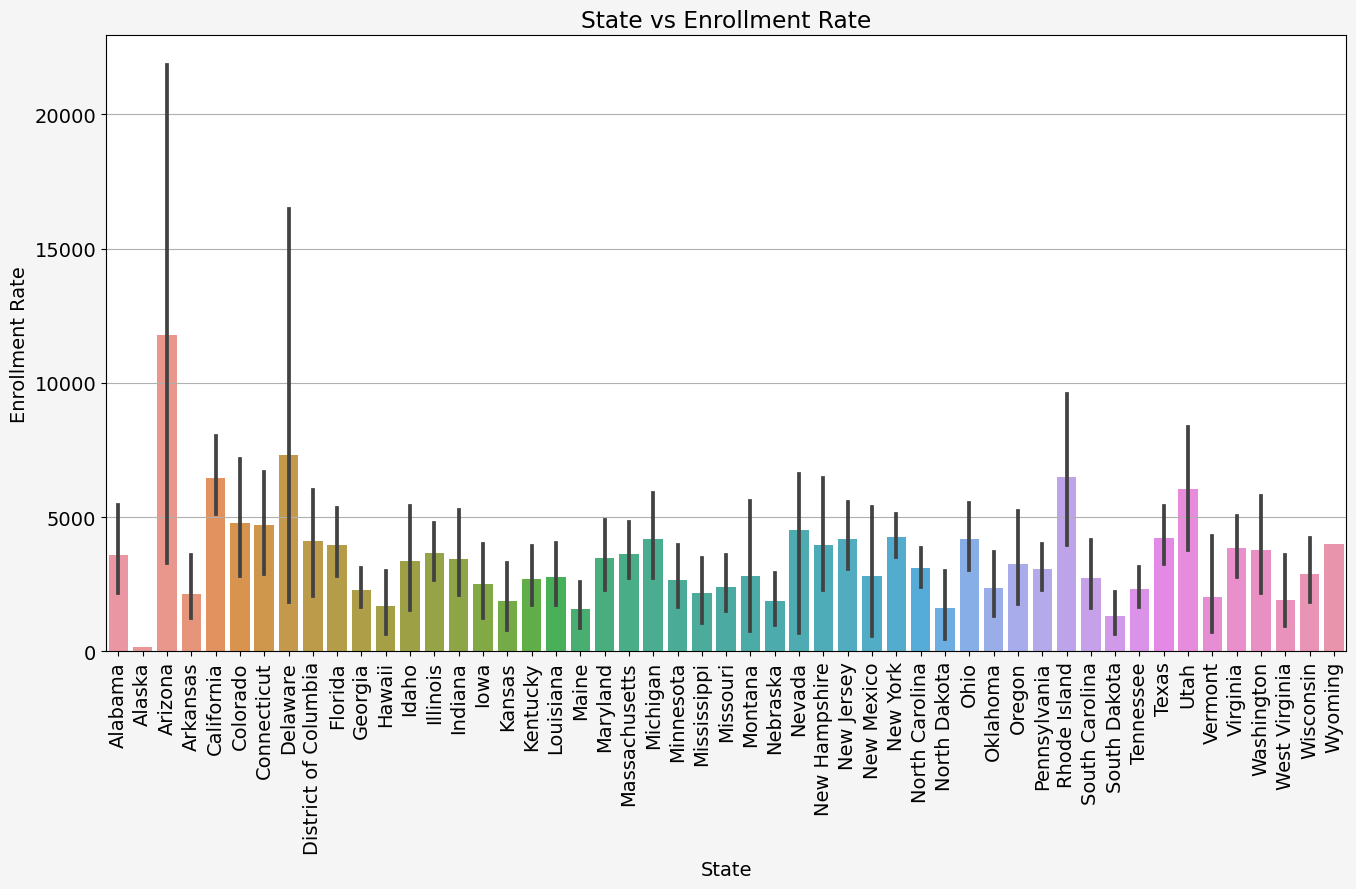

In [83]:
plt.figure(figsize=(16,8))
sns.barplot(x=universitiesnw_df['state abbreviation'],y= universitiesnw_df['admissions total']);
plt.title('State vs Enrollment Rate')
plt.grid(axis='y')
plt.xticks(rotation=90);
plt.xlabel('State')
plt.ylabel('Enrollment Rate');

In [ ]:
plt.xlabel("Sugar Level")
plt.ylabel("Number Of Patients")
plt.title("Blood Sugar Chart")

plt.hist([blood_sugar_men,blood_sugar_women], bins=[80,100,125,150], rwidth=1, color=['blue','red']);


In [ ]:
sns.barplot(y=region['total_price_for_in_state_students_living_on_campus_2013_14'],x=region['control of institution'])
plt.title('Average and variation of the Cost for \nOut-of-state Students Living on Campus (2013-2014)')        
plt.ylabel('Cost of on campus living $')
plt.show()
sns.scatterplot(x=region['total price for outofstate students living on campus 201314'],y=region.enrollment_rate,hue=region['control of institution']);
plt.title('Cost for Out-of-state Students Living \non Campus vs Enrollment Rate (2013-2014)')
plt.xlabel('Cost of on campus living $')
plt.ylabel('Enrollment Rate')
plt.tight_layout(pad=2)

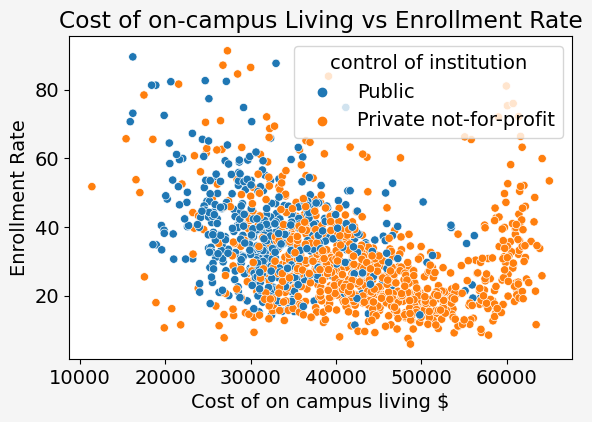

In [86]:
sns.scatterplot(x=universitiesnw_df['total price for outofstate students living on campus 201314'],y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df['control of institution']);
plt.title('''Cost of on-campus Living vs Enrollment Rate''')
plt.xlabel('Cost of on campus living $')
plt.ylabel('Enrollment Rate')
plt.tight_layout(pad=2)

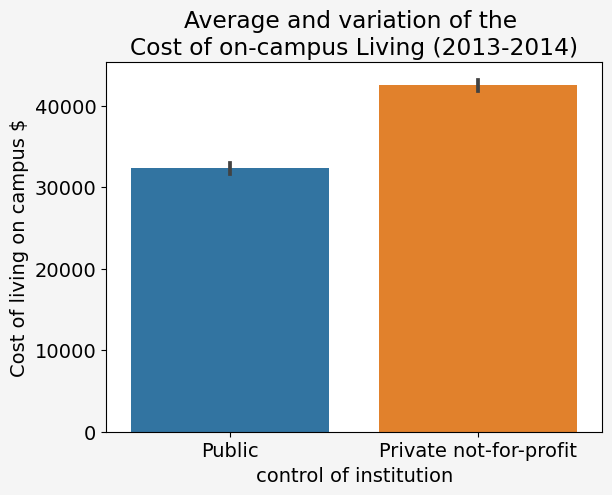

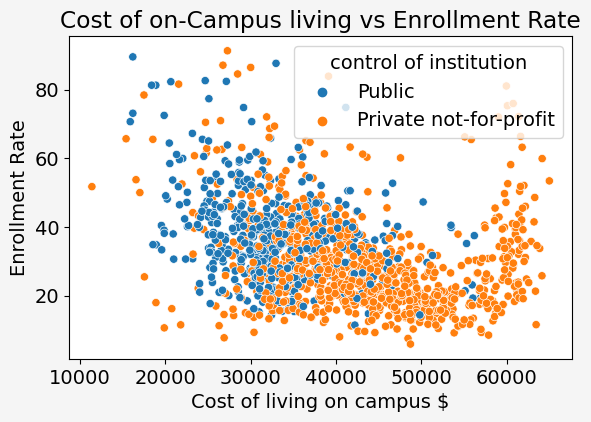

In [87]:
sns.barplot(y=universitiesnw_df['total price for outofstate students living on campus 201314'],x=universitiesnw_df['control of institution'])
plt.title('''Average and variation of the \nCost of on-campus Living (2013-2014)''')        
plt.ylabel('Cost of living on campus $')
plt.show()
sns.scatterplot(x=universitiesnw_df['total price for outofstate students living on campus 201314'],y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df['control of institution']);
plt.title('''Cost of on-Campus living vs Enrollment Rate''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')
plt.tight_layout(pad=2)



In [88]:
with open('states_gdp.csv') as file:
    gdp_df=pd.read_csv(file)

In [89]:
gdp_df.head()

,code,state,gdp_million
0,1000,Alabama,191481.0
1,2000,Alaska,56622.8
2,4000,Arizona,275199.1
3,5000,Arkansas,114251.5
4,6000,California,2262771.2


In [90]:
gdp_df.drop(columns=['code'],inplace=True)

In [ ]:
universitiesnw_df=universitiesnw_df.merge(gdp_df,on='state')

In [ ]:
universitiesnw_df=universitiesnw_df.merge(gdp_df,on='state')

In [ ]:
universitiesnw_df[['state','gdp_million','population']].head()

In [ ]:
plt.figure(figure=(16,7))
sns.scatterplot(x='gdp_capita',y= 'enrollment_rate', data=universitiesnw_df);
plt.axis([30000,80000,0,10]);
plt.grid();
plt.title('GDP per Capita vs Enrollement Rate')
plt.xlable('GDP per Capita $')
plt.ylable('Enrollement Rate %');sns.despine();

In [ ]:
# Explode, percentage
plt.axis("additional academic")
plt.pie(exp_vals,labels=exp_labels, autopct='%1.2f%%',radius=1.5,explode=[0,0,0,0.5,0])
plt.show()

In [115]:

import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
sns.countplot(y=universitiesnw_df['Cost of on-Campus living'])
plt.title('''Degrees offered''')        
plt.show()

In [155]:
higher_degree = ["Offers Master's degree",
                "Offers Doctor's degree - research/scholarship",
                "Offers Doctor's degree - professional practice",
                "Offers Doctor's degree - other"]

In [156]:
other_degree = list(set(degree_offers) - set(higher_degree))
other_degree

['Offers Postbaccalaureate certificate',
 'Offers Less than one year certificate',
 "Offers Post-master's certificate",
 'Offers Two but less than 4 years certificate',
 'Offers Other degree',
 "Offers Associate's degree",
 'Offers One but less than two years certificate']

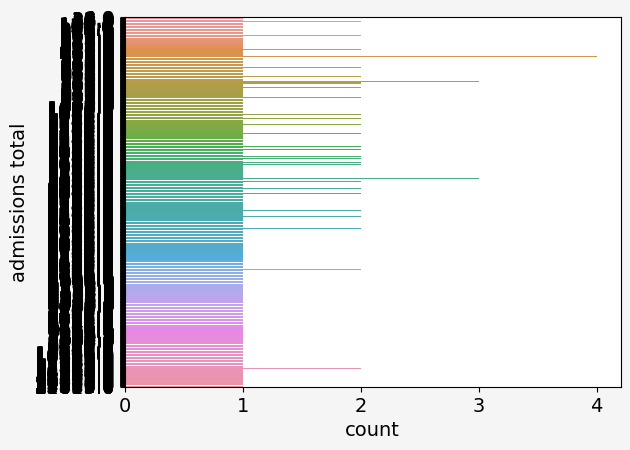

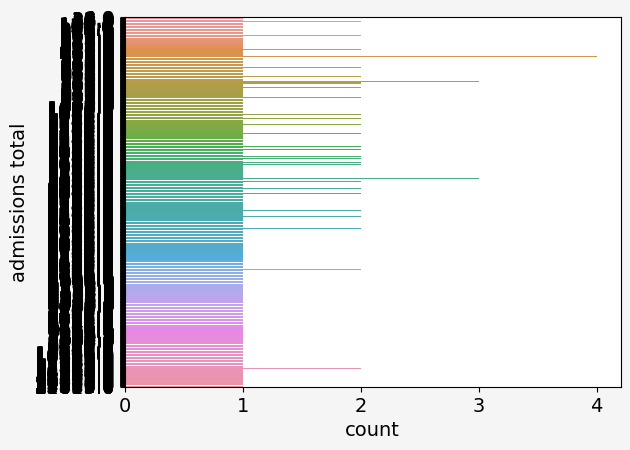

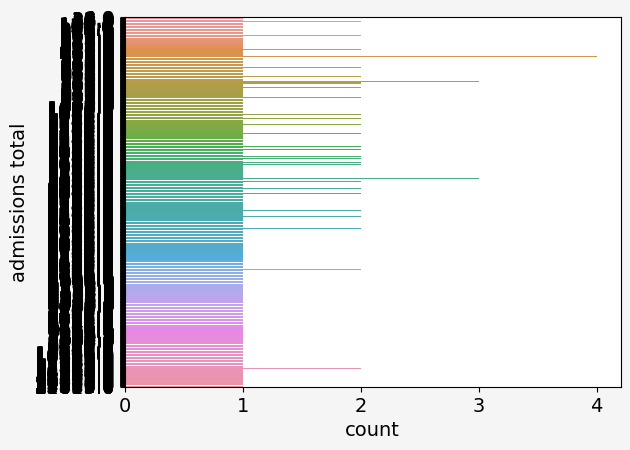

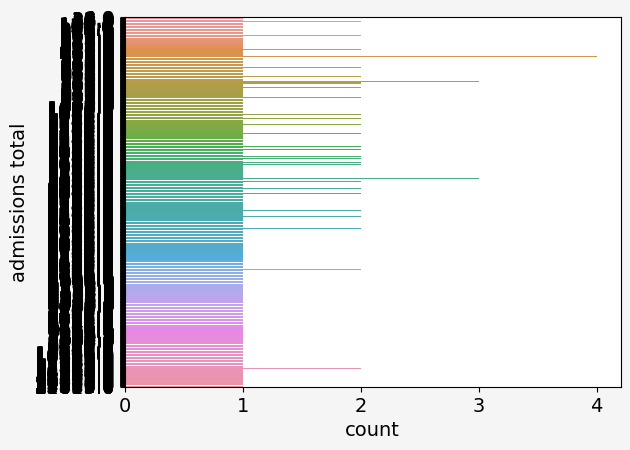

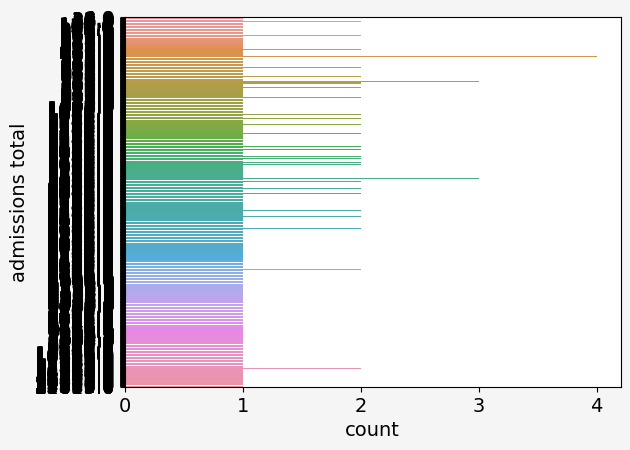

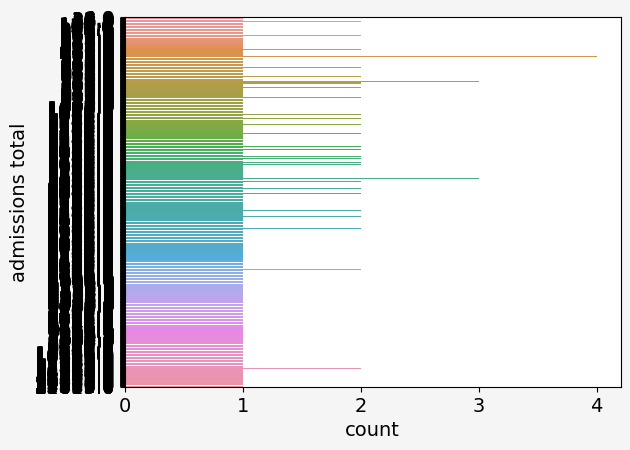

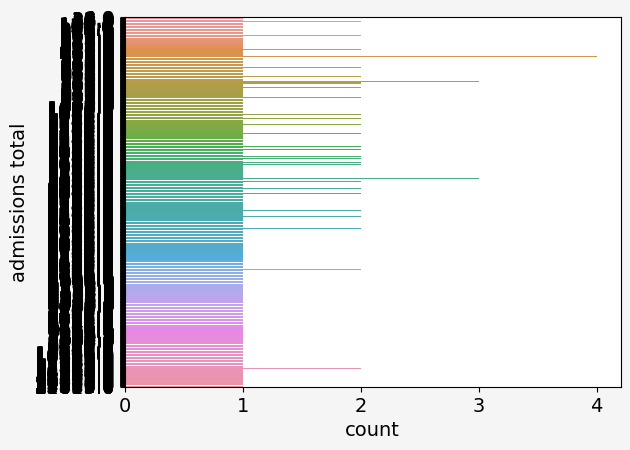

In [166]:
for degree in other_degree:
    sns.countplot(data=universitiesnw_df, y='admissions total')
    plt.show()

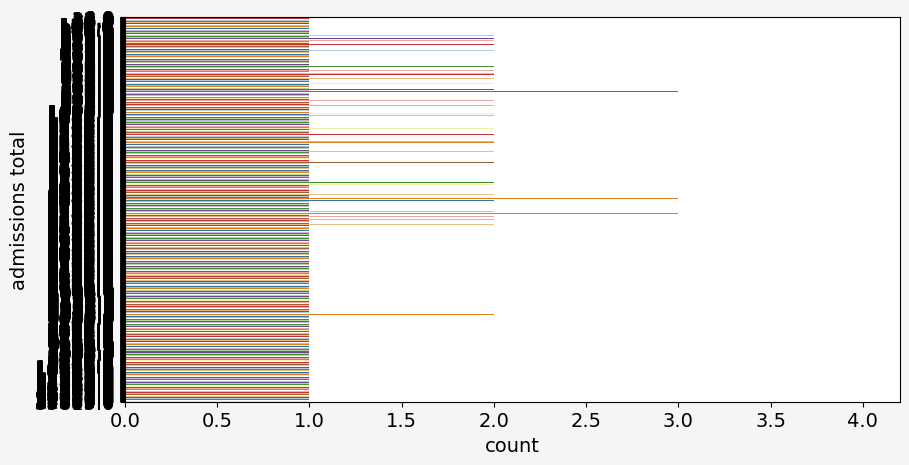

In [179]:
plt.figure(figsize=(10,5))
sns.countplot(y=universitiesnw_df['admissions total'], palette = "Paired");

# Inferences and Conclusion